# Entrega 2

Sara Hernandez y 
Michelle Gomez

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
tickers = ['DLR','JCI','PFE','COST','JPM']


In [11]:
prices = yf.download(tickers, start='2018-01-01', end='2024-01-01')['Close']
prices

C:\Users\miche\AppData\Local\Temp\ipykernel_31956\1694127679.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start='2018-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,COST,DLR,JCI,JPM,PFE
Date,,,,,
2018-01-02,168.728348,85.995468,31.952387,86.730362,24.656246
2018-01-03,170.753281,86.781677,32.562504,86.818718,24.838936
2018-01-04,169.427216,85.705399,33.306370,88.062454,24.893066
2018-01-05,168.217651,86.254982,32.111179,87.497131,24.940434
2018-01-08,168.871704,87.132782,32.545780,87.626343,24.663015
...,...,...,...,...,...
2023-12-22,649.465332,128.113052,55.129955,160.106552,25.397602
2023-12-26,652.385864,128.549225,55.994701,161.053391,25.406546
2023-12-27,659.487061,129.051727,56.043278,162.019394,25.585402


In [13]:
dailyreturns=prices.pct_change().dropna()
dailyreturns

Ticker,COST,DLR,JCI,JPM,PFE
Date,,,,,
2018-01-03,0.012001,0.009142,0.019095,0.001019,0.007409
2018-01-04,-0.007766,-0.012402,0.022844,0.014326,0.002179
2018-01-05,-0.007139,0.006412,-0.035885,-0.006420,0.001903
2018-01-08,0.003888,0.010177,0.013534,0.001477,-0.011123
2018-01-09,-0.011619,-0.013578,-0.004879,0.005069,-0.001098
...,...,...,...,...,...
2023-12-22,0.009682,0.001556,0.013757,-0.000597,0.003179
2023-12-26,0.004497,0.003405,0.015686,0.005914,0.000352
2023-12-27,0.010885,0.003909,0.000868,0.005998,0.007040


In [15]:
mean_ret = dailyreturns.mean()*252
std_ret = dailyreturns.std()*np.sqrt(252)

mean_ret, std_ret

(Ticker
 COST    0.253875
 DLR     0.111693
 JCI     0.136017
 JPM     0.151482
 PFE     0.040330
 dtype: float64,
 Ticker
 COST    0.235088
 DLR     0.302701
 JCI     0.289576
 JPM     0.304921
 PFE     0.257573
 dtype: float64)

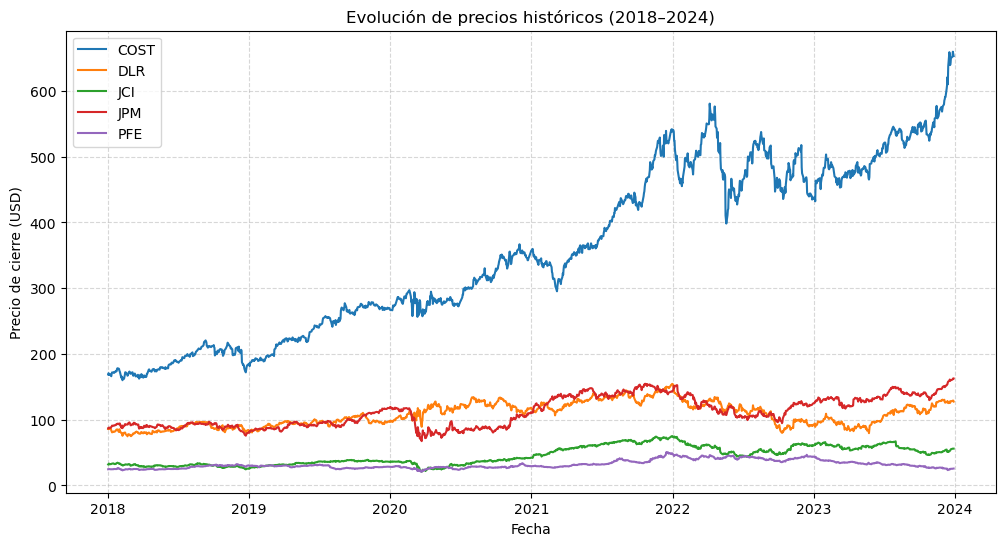

In [19]:
plt.figure(figsize=(12, 6))
for col in prices.columns:
    plt.plot(prices.index, prices[col], label=col)
plt.title('Evolución de precios históricos (2018–2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

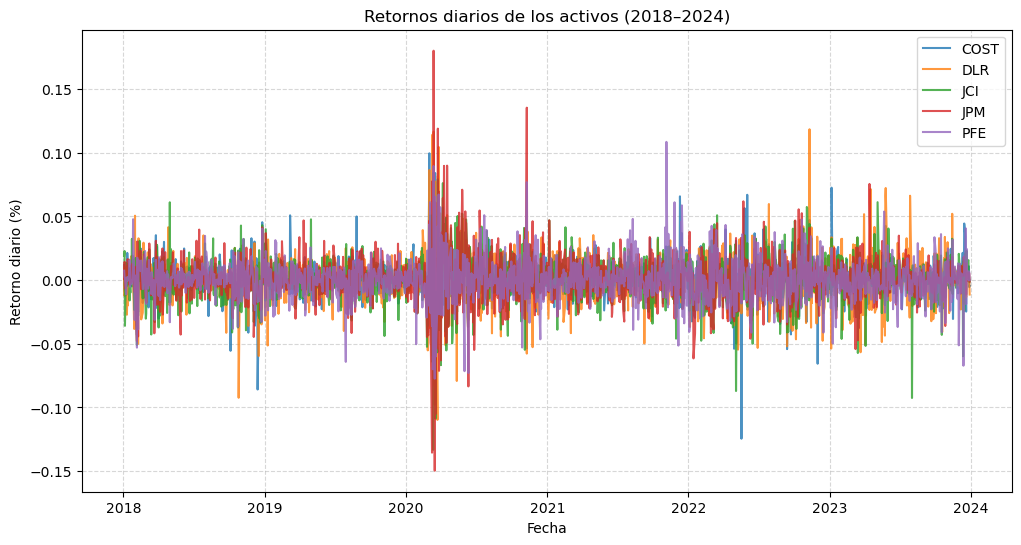

In [21]:
plt.figure(figsize=(12, 6))
for col in dailyreturns.columns:
    plt.plot(dailyreturns.index, dailyreturns[col], label=col, alpha=0.8)
plt.title('Retornos diarios de los activos (2018–2024)')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

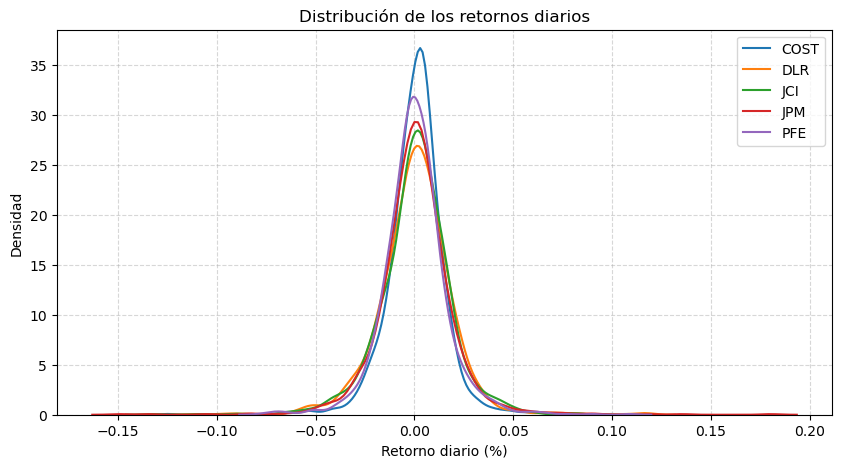

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 5))
for col in dailyreturns.columns:
    sns.kdeplot(dailyreturns[col], label=col)
plt.title('Distribución de los retornos diarios')
plt.xlabel('Retorno diario (%)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [69]:
# --- Umbral de 3 desviaciones estándar (por activo) ---
events = {}

for col in dailyreturns.columns:
    mu = dailyreturns[col].mean()
    sigma = dailyreturns[col].std()
    threshold = 3 * sigma
    extremes = dailyreturns[(dailyreturns[col] > mu + threshold) | (dailyreturns[col] < mu - threshold)][col]
    events[col] = extremes

# --- Mostrar resultados por activo ---
for col, vals in events.items():
    print(f"\n=== {col} ===")
    print(f"Total de eventos extremos: {len(vals)}")
    print(vals.sort_values().head())   # Peores 5 días
    print(vals.sort_values(ascending=False).head())  # Mejores 5 días



=== COST ===
Total de eventos extremos: 25
Date
2022-05-18   -0.124513
2018-12-14   -0.085868
2022-12-01   -0.065628
2020-03-16   -0.063155
2020-03-12   -0.059106
Name: COST, dtype: float64
Date
2020-03-02    0.099594
2020-03-17    0.084081
2020-03-13    0.080114
2023-01-06    0.072592
2022-06-02    0.067004
Name: COST, dtype: float64

=== DLR ===
Total de eventos extremos: 21
Date
2020-03-23   -0.109736
2020-03-16   -0.097806
2018-10-26   -0.092380
2020-03-19   -0.087884
2020-05-12   -0.079177
Name: DLR, dtype: float64
Date
2022-11-10    0.118447
2020-03-13    0.116616
2020-03-10    0.114196
2020-03-26    0.104587
2020-03-02    0.086421
Name: DLR, dtype: float64

=== JCI ===
Total de eventos extremos: 20
Date
2020-03-12   -0.133201
2020-03-18   -0.108703
2023-08-02   -0.092532
2022-05-04   -0.087062
2020-03-16   -0.067358
Name: JCI, dtype: float64
Date
2020-03-13    0.084270
2020-03-24    0.079149
2020-04-06    0.076168
2023-05-05    0.061186
2018-05-01    0.061116
Name: JCI, dtype: 

In [25]:
benchmark = yf.download('^GSPC', start='2018-01-01', end='2024-01-01')['Close']
benchmark

C:\Users\miche\AppData\Local\Temp\ipykernel_31956\3764405661.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download('^GSPC', start='2018-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2023-12-22,4754.629883
2023-12-26,4774.750000
2023-12-27,4781.580078


In [49]:
benchmark_dailyreturns = benchmark.pct_change().dropna()
benchmark_dailyreturns

Ticker,^GSPC
Date,
2018-01-03,0.006399
2018-01-04,0.004029
2018-01-05,0.007034
2018-01-08,0.001662
2018-01-09,0.001303
...,...
2023-12-22,0.001660
2023-12-26,0.004232
2023-12-27,0.001430


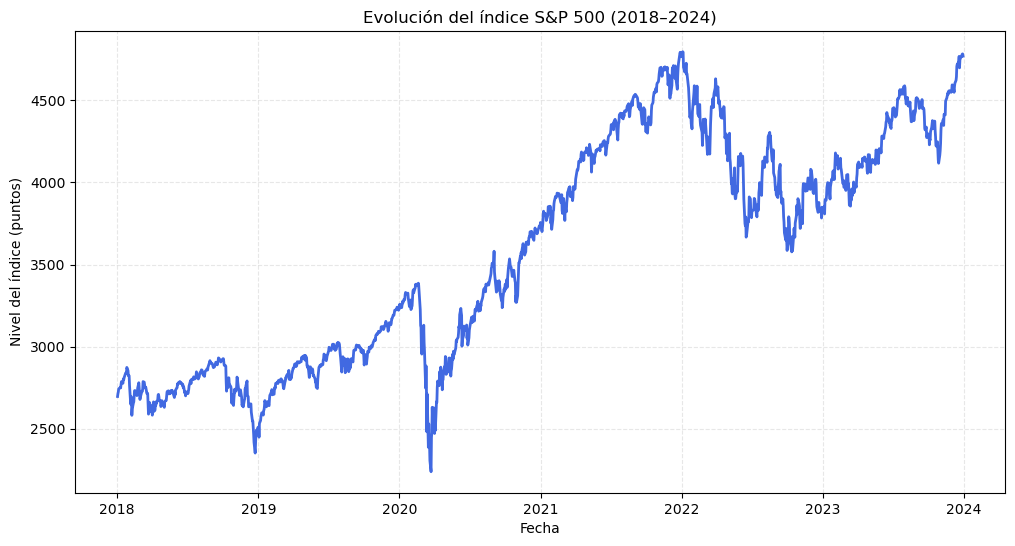

In [51]:
plt.figure(figsize=(12,6))
plt.plot(benchmark.index, benchmark, color='royalblue', linewidth=2)
plt.title('Evolución del índice S&P 500 (2018–2024)')
plt.xlabel('Fecha')
plt.ylabel('Nivel del índice (puntos)')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

In [55]:
# trabajando con w iguales para despues optimizar dichos pesos
weights = np.repeat(1/len(tickers), len(tickers))
portfolio_returns = (dailyreturns * weights).sum(axis=1)

In [59]:
cum_portfolio = (1 + portfolio_returns).cumprod()
cum_benchmark = (1 + benchmark_dailyreturns).cumprod()

In [63]:
def performance_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annual_volatility = returns.std() * np.sqrt(252)
    return total_return, annual_volatility

port_ret, port_vol = performance_metrics(portfolio_returns)
bench_ret, bench_vol = performance_metrics(benchmark_dailyreturns)

metrics = pd.DataFrame({
    'Rendimiento acumulado': [port_ret, bench_ret],
    'Volatilidad anualizada': [port_vol, bench_vol]
}, index=['Portafolio', 'S&P 500'])
metrics

,Rendimiento acumulado,Volatilidad anualizada
Portafolio,1.040088,0.197523
S&P 500,Ticker ^GSPC 0.769349 dtype: float64,Ticker ^GSPC 0.206715 dtype: float64


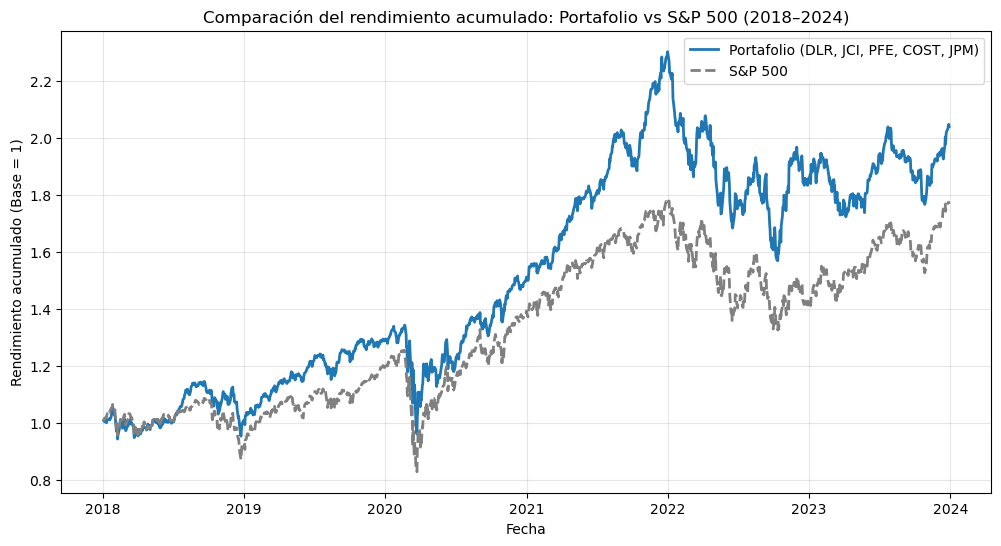

In [65]:
plt.figure(figsize=(12,6))
plt.plot(cum_portfolio.index, cum_portfolio, label='Portafolio (DLR, JCI, PFE, COST, JPM)', linewidth=2)
plt.plot(cum_benchmark.index, cum_benchmark, label='S&P 500', linestyle='--', color='gray', linewidth=2)
plt.title('Comparación del rendimiento acumulado: Portafolio vs S&P 500 (2018–2024)')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento acumulado (Base = 1)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()